-----
<center>
<h1 style="font-size: 50px; font-family: serif;">Fuel Consumption Ratings Regression !</h1>
</center>

---

<center>
<img src="https://media.tenor.com/GRq2qp1DU0wAAAAC/fuel-gas.gif" width="550" height='100'>
</center>


---
# Metadata:
---    
**1. Dataset**   : Given dataset contain 2022 Fuel Consumption Ratings information.

**2. Model Year**: Represent the year in which a particular model of a vehicle was produced. 

**3. Make**	  : It describe the brand or manufacturer of a vehicle.

**4. Model**     : It refers to a specific version of a vehicle produced by a manufacturer under a particular make or brand.

**5. Vehicle Class**: Represent the categorization system used in the automotive industry to group vehicles based on their                        size, body style, and intended use. 

**6. Engine Size**  : It tell us about the total volume of air and fuel that can be drawn into the engine cylinders of a                          vehicle's engine during one complete cycle. It is typically measured in either cubic centimeters (cc)                      or liters (L).

**7. Cylinders**    : It refer to the individual chambers within a vehicle's engine where the combustion process takes place.

**8. Transmission** : It represent the system in which power transmission take place, from the engine to the wheels, which                        allowing the vehicle to move forward or backward

**9. Fuel Type**    : It refers to the specific type of fuel that is used to power a vehicle, machine,
                      or other device.
                      Z=  Premium gasoline | D=  Diesel | E=  Ethanol 
                      |  X=Regular gasoline
                   

**10. Fuel Consumption(City (L/100 km)** : it represent fuel consumption in the city.

**11. Fuel Consumption(Hwy (L/100 km)** : it represent fuel consumption on the Highway.

**12. Fuel Consumption(Comb (L/100 km)** : it represent fuel consumption for both city and highway.

**13. Fuel Consumption(Comb (mpg))**: it represent fuel consumption for both city & highway, in miles per imperial gallon(mpg).

**14. CO2 Emissions(g/km)** : It refer to the amount of CO2 that is emitted by a vehicle for every kilometer that it is driven.

**15. CO2 Rating**  : It's measure a vehicle's carbon dioxide (CO2) emissions, typically expressed in grams of CO2 per                           kilometer(g/km).

**16. Smog Rating** : It's measure a vehicle's emissions of pollutants that contribute to the formation of smog. 

------------------------------
<center id="report">
<h1 style="font-size: 30px; font-family: serif;">Report content</h1>
</center>

---


1. <a href="#Importmodules">Import Modules</a><br>
    1.1 <a href="#Importdata">Importing data into Dataframe</a><br>
    
2. <a href="#Datatcleaning">Data cleaning</a><br>
    2.1 <a href="#df1">Creating new DataFrame with necessary columns</a><br>
    2.2 <a href="#nullcheck">Checking null values</a><br>
    2.3 <a href="#treatfuel">Treating Null's in "Fuel type"</a><br>
    2.4 <a href="#nullco2">Dealing with the nulls present in feature "CO2 Rating"</a><br>
    
<a href="#eda"># Exploratory Data Analysis (E.D.A.)</a><br>

3. <a href="#univar">Univariate analysis:-</a><br>
    3.1  <a href="#mean">Checking Mean, Median, Standard Deviation and Quantile</a><br>
    3.2 <a href="#distribute">Frequency Distribution for the categorical Columns</a><br>
    3.3 <a href="#numerical">Frequency Distribution on Numerical columns</a><br>
    
4. <a href="#bivariate">Bivariate analysis:-</a><br>
    4.1 <a href="#compare">Comparison Between all columns</a><br>
    4.2  <a href="#comparecylinder">Comparison between "No. of cylinders" & "Fuel consumption"</a><br>
    4.3 <a href="#chi">Performing Chi Square analysis</a><br>
    4.4 <a href="#heatcorr">Heatmap showing "Pearson correlation"</a><br>
    

5. <a href="#prepro">Data Preprocessing</a><br>
    5.1 <a href="#outlier">Outlier analysis</a><br>
    5.2 <a href="#ordinal">Ordinal encoding</a><br>
    5.3 <a href="#onehot">One Hot encoding on categorical columns</a><br>
    5.4 <a href="#traintest">Split into train and test set</a><br>
    5.5 <a href="#scailing">Feature Scaling</a><br>
    

6. <a href="#model">Training Models</a><br>
    6.1 <a href="#linear">Linear Regression</a><br>
    6.2  <a href="#decision">Decision Tree Regressor</a><br>
    6.3 <a href="#rf">Random Forest Regressor</a><br>
    
    
    
7. <a href="#deployment">Model Deployment</a><br>
    7.1 <a href="#pickling">Pickling Model and Scaler object for Deployment</a><br>  

---
# 1. Import Modules 
<span id="Importmodules"></span>

---

## Pandas Module

In [407]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

## M.L. Modules

In [550]:
from scipy.stats import chi2_contingency

#data transformation
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# Decision Tree Regressor Model
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

# Random Forest Regressor Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV


# 1.1 Creating Dataframe & Basic Observation
<span id="Importdata"></span>

<a href="#report"><button>REPORT CONTENT</button></a>

In [409]:
data = pd.read_csv(r"D:\MASAI\ML\FUEL_CONSUMPTION_PROJECT\MY2022 Fuel Consumption Ratings.csv")
data

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,NaN,7.0,8.6,33.0,200.0,6.0,3.0
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25.0,263.0,4.0,5.0
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29.0,232.0,5.0,6.0
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27.0,242.0,5.0,6.0
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29.0,230.0,5.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30.0,219.0,5.0,5.0
941,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30.0,219.0,5.0,5.0
942,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29.0,232.0,5.0,NaN
943,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28.0,236.0,5.0,5.0


In [410]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Model Year                         945 non-null    int64  
 1   Make                               945 non-null    object 
 2   Model                              945 non-null    object 
 3   Vehicle Class                      945 non-null    object 
 4   Engine Size(L)                     945 non-null    float64
 5   Cylinders                          945 non-null    int64  
 6   Transmission                       945 non-null    object 
 7   Fuel Type                          944 non-null    object 
 8   Fuel Consumption (City (L/100 km)  931 non-null    float64
 9   Fuel Consumption(Hwy (L/100 km))   930 non-null    float64
 10  Fuel Consumption(Comb (L/100 km))  945 non-null    float64
 11  Fuel Consumption(Comb (mpg))       931 non-null    float64

In [411]:
data.columns

Index(['Model Year', 'Make', 'Model', 'Vehicle Class', 'Engine Size(L)',
       'Cylinders', 'Transmission', 'Fuel Type',
       'Fuel Consumption (City (L/100 km)', 'Fuel Consumption(Hwy (L/100 km))',
       'Fuel Consumption(Comb (L/100 km))', 'Fuel Consumption(Comb (mpg))',
       'CO2 Emissions(g/km)', 'CO2 Rating', 'Smog Rating'],
      dtype='object')

In [412]:
data[['CO2 Rating','Smog Rating','CO2 Emissions(g/km)']].corr()

,CO2 Rating,Smog Rating,CO2 Emissions(g/km)
CO2 Rating,1.000000,0.503795,-0.955018
Smog Rating,0.503795,1.000000,-0.520441
CO2 Emissions(g/km),-0.955018,-0.520441,1.000000


-----
<center>
<h1 style="font-size: 40px; font-family: serif;">2. Data cleaning</h1>
</center>
<span id="Datatcleaning"></span>

---

<a href="#report"><button>REPORT CONTENT</button></a>

# 2.1 Creating new DataFrame with necessary columns
<span id="df1"></span>


In [413]:
df= data.drop(['Model Year','Make','Model','Fuel Consumption (City (L/100 km)','Fuel Consumption(Hwy (L/100 km))','Fuel Consumption(Comb (mpg))','CO2 Emissions(g/km)','Smog Rating'],axis=1)

**New DataFrame**

In [414]:
df

,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption(Comb (L/100 km)),CO2 Rating
0,Compact,2.4,4,AM8,Z,8.6,6.0
1,SUV: Small,3.5,6,AS10,Z,11.2,4.0
2,SUV: Small,2.0,4,AS10,Z,9.9,5.0
3,SUV: Small,2.0,4,AS10,Z,10.3,5.0
4,Compact,2.0,4,AS10,Z,9.8,5.0
...,...,...,...,...,...,...,...
940,SUV: Small,2.0,4,AS8,Z,9.4,5.0
941,SUV: Small,2.0,4,AS8,Z,9.4,5.0
942,SUV: Small,2.0,4,AS8,Z,9.9,5.0
943,SUV: Standard,2.0,4,AS8,Z,10.1,5.0


**Renaming the columns**

In [415]:
df = df.rename(columns = {'Vehicle Class':'Vehicle Class', 'Engine Size(L)':'Engine Size', 'Cylinders': 'Cylinders', 'Transmission':'Transmission','Fuel Type':'Fuel Type', 'Fuel Consumption(Comb (L/100 km))':'Fuel Consumption', 'CO2 Rating':'CO2 Rating'})

## 2.2 Checking null values
<span id="nullcheck"></span>

In [416]:
df.isna().sum()

Vehicle Class        0
Engine Size          0
Cylinders            0
Transmission         0
Fuel Type            1
Fuel Consumption     0
CO2 Rating          13
dtype: int64

## 2.3.1  Fuel type
<span id="treatfuel"></span>

In [417]:
df['Fuel Type'].fillna((df['Fuel Type'].mode()[0]), inplace=True)

In [418]:
df.head()

,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel Type,Fuel Consumption,CO2 Rating
0,Compact,2.4,4,AM8,Z,8.6,6.0
1,SUV: Small,3.5,6,AS10,Z,11.2,4.0
2,SUV: Small,2.0,4,AS10,Z,9.9,5.0
3,SUV: Small,2.0,4,AS10,Z,10.3,5.0
4,Compact,2.0,4,AS10,Z,9.8,5.0


## 2.3.2 CO2 Rating
<span id="nullco2"></span>

In [420]:
df['CO2 Rating'].fillna(0,inplace=True)
new_ratting = []

for fuel,co2 in zip(df['Fuel Consumption'], df['CO2 Rating']):
    if co2==0:
        if 20 <= fuel:
            new_ratting.append(1)
        elif 16.0 <= fuel < 20.0:
            new_ratting.append(2) 
        elif 14.0 <= fuel < 16.0: 
            new_ratting.append(3)
        elif 12.0 <= fuel < 14.0: 
            new_ratting.append(4)
        elif 10.0 <= fuel < 12.0: 
            new_ratting.append(5)
        elif 8.0 <= fuel < 10.0: 
            new_ratting.append(6)
        elif 7.0 <= fuel < 8.0: 
            new_ratting.append(7)
        elif 6.0 <= fuel < 7.0: 
            new_ratting.append(8)
        elif 5.0 <= fuel < 6.0: 
            new_ratting.append(9)
        elif fuel < 5.0: 
            new_ratting.append(10)            
    else:
        new_ratting.append(co2)
        
        
df['CO2 Rating'] = new_ratting

In [421]:
df.isna().sum()

Vehicle Class       0
Engine Size         0
Cylinders           0
Transmission        0
Fuel Type           0
Fuel Consumption    0
CO2 Rating          0
dtype: int64

## Checking the correlation

In [422]:
df.corr()

,Engine Size,Cylinders,Fuel Consumption,CO2 Rating
Engine Size,1.000000,0.920672,0.818655,-0.766032
Cylinders,0.920672,1.000000,0.821719,-0.761408
Fuel Consumption,0.818655,0.821719,1.000000,-0.927449
CO2 Rating,-0.766032,-0.761408,-0.927449,1.000000


**Checking Corelation of each feature against target variable**

In [423]:
df.corr()["Fuel Consumption"].to_frame()

,Fuel Consumption
Engine Size,0.818655
Cylinders,0.821719
Fuel Consumption,1.000000
CO2 Rating,-0.927449


## Looking for noise in all the features, including Target variable.

In [424]:
for i in df.columns:
    print(i)
    print(df[i].unique(),'\n')

Vehicle Class
['Compact' 'SUV: Small' 'Mid-size' 'Minicompact' 'SUV: Standard'
 'Two-seater' 'Subcompact' 'Station wagon: Small'
 'Station wagon: Mid-size' 'Full-size' 'Pickup truck: Small'
 'Pickup truck: Standard' 'Minivan' 'Special purpose vehicle'] 

Engine Size
[2.4 3.5 2.  3.  2.9 4.  5.2 2.5 6.  4.4 6.6 8.  3.6 1.4 1.2 1.3 2.7 6.2
 2.8 1.5 5.3 5.7 6.4 2.3 3.3 5.  1.8 1.6 3.8 5.6 3.2 6.5 4.6 3.4 3.7 6.7] 

Cylinders
[ 4  6  8 12 10  5 16  3] 

Transmission
['AM8' 'AS10' 'A8' 'A9' 'AM7' 'AS8' 'M6' 'AS6' 'AV' 'AS9' 'A10' 'A6' 'M5'
 'M7' 'AV7' 'AV1' 'AM6' 'AS7' 'AV8' 'AV6' 'AV10' 'AS5' 'A7'] 

Fuel Type
['Z' 'X' 'D' 'E'] 

Fuel Consumption
[ 8.6 11.2  9.9 10.3  9.8 11.   8.7  9.2 11.6  9.3  9.6 12.3 11.5 13.8
 14.6  7.6  8.2  8.8  8.9  9.1 10.  10.6  9.4 10.8 11.7 15.3 11.4 13.7
 13.5 15.4  9.7 10.9 13.9 10.1  9.  13.2 16.3 12.2 16.2 12.5 17.  16.
  8.3 12.  12.6 12.7 12.9 15.1 10.4 15.7 11.1  8.5 22.2 26.1 11.8  7.8
  7.9  9.5 10.2 13.  10.7 14.8 15.2 10.5 14.7 14.9 11.3 12.1 14.1 

## Removed the Numbers from Transmission columns

In [425]:
#df = df.replace({'Transmission' : {'AM8':'AM', 'AS10': 'AS', 'A8':'A', 'A9':'A', 'AM7':'AM', 'AS8':'AS', 'M6':'M', 'AS6':'AS', 'AS9':'AS', 'A10':'A', 'A6':'A', 'M5':'M', 'M7':'M', 'AV7':'AV', 'AV1':'AV', 'AM6':'AM', 'AS7':'AS', 'AV8':'AV', 'AV6':'AV', 'AV10':'AV', 'AS5':'AS', 'A7':'A'}})
#df

In [426]:
#df['Transmission'].unique()

-----
<center>
<h1 style="font-size: 40px; font-family: serif;">Exploratory Data Analysis (E.D.A.)</h1>
</center>
<span id="eda"></span>

---

<a href="#report"><button>REPORT CONTENT</button></a>


# 3. Univariate analysis:-
<span id="univar"></span>

---

## 3.1 Statistical Summary :
<span id="mean"></span>


In [427]:
df[['Engine Size','Cylinders','Fuel Consumption','CO2 Rating']].describe()

,Engine Size,Cylinders,Fuel Consumption,CO2 Rating
count,945.000000,945.000000,945.000000,945.000000
mean,3.199683,5.669841,11.093439,4.542857
std,1.375231,1.932930,2.877491,1.471665
min,1.200000,3.000000,4.000000,1.000000
25%,2.000000,4.000000,9.100000,3.000000
50%,3.000000,6.000000,10.800000,5.000000
75%,3.800000,6.000000,12.900000,5.000000
max,8.000000,16.000000,26.100000,10.000000


## 3.2 Frequency Distribution for the categorical Columns
<span id="distribute"></span>


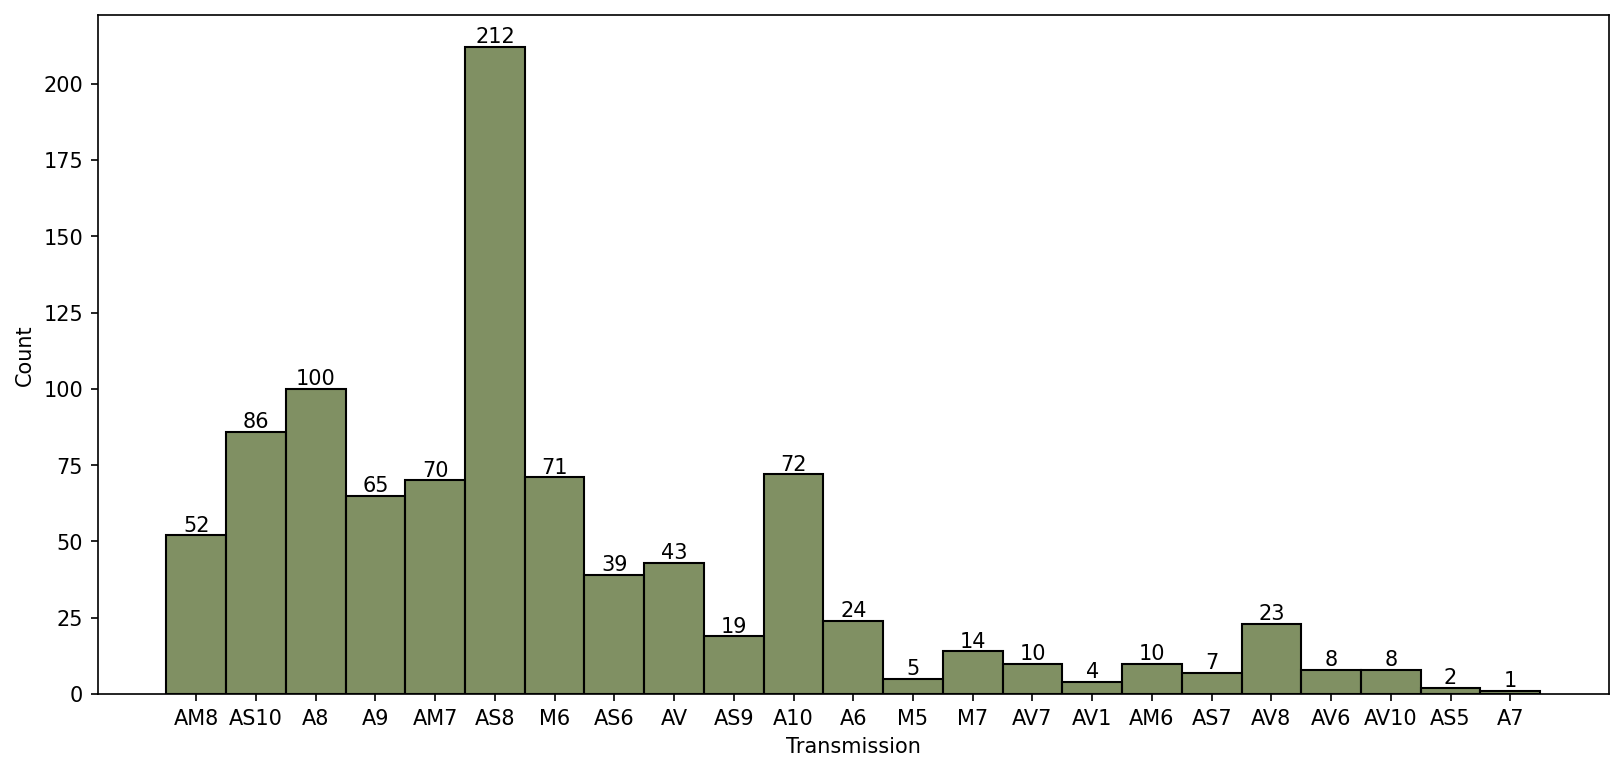

In [428]:
plt.figure(figsize=(13,6), dpi=150)
chart1=sns.histplot(data=df, x='Transmission', color='DarkOliveGreen')
chart1.bar_label(chart1.containers[0],size=10)
plt.show()

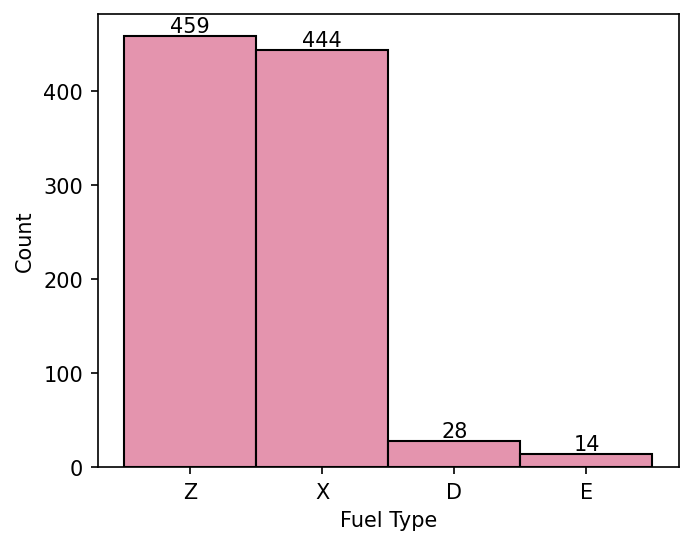

In [429]:
plt.figure(figsize=(5,4), dpi=150)
chart1=sns.histplot(data=df, x='Fuel Type', color='PaleVioletRed')
chart1.bar_label(chart1.containers[0],size=10)
plt.show()

## 3.3 Frequency Distribution on Numerical columns
<span id="numerical"></span>


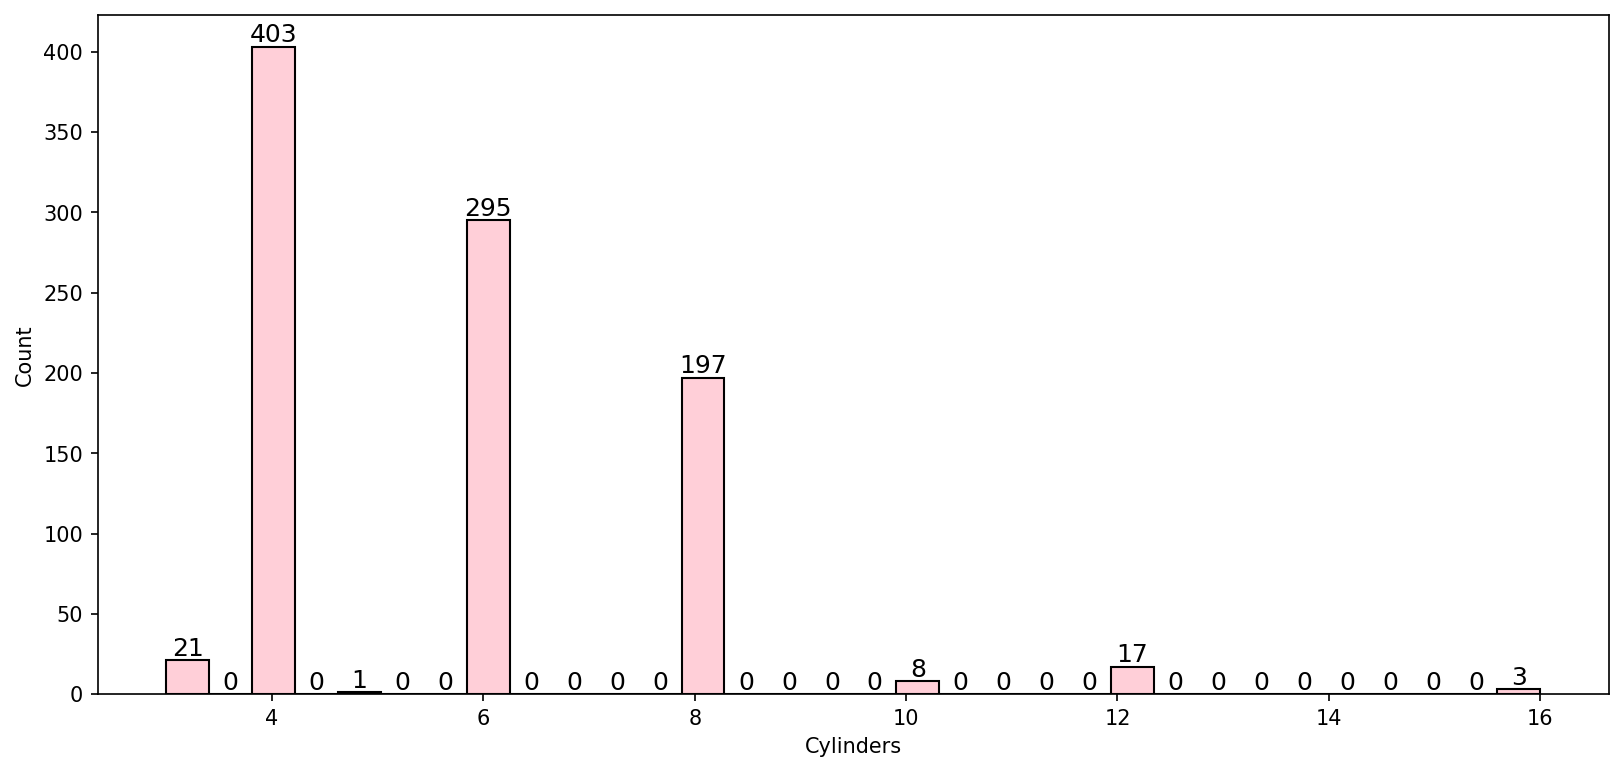

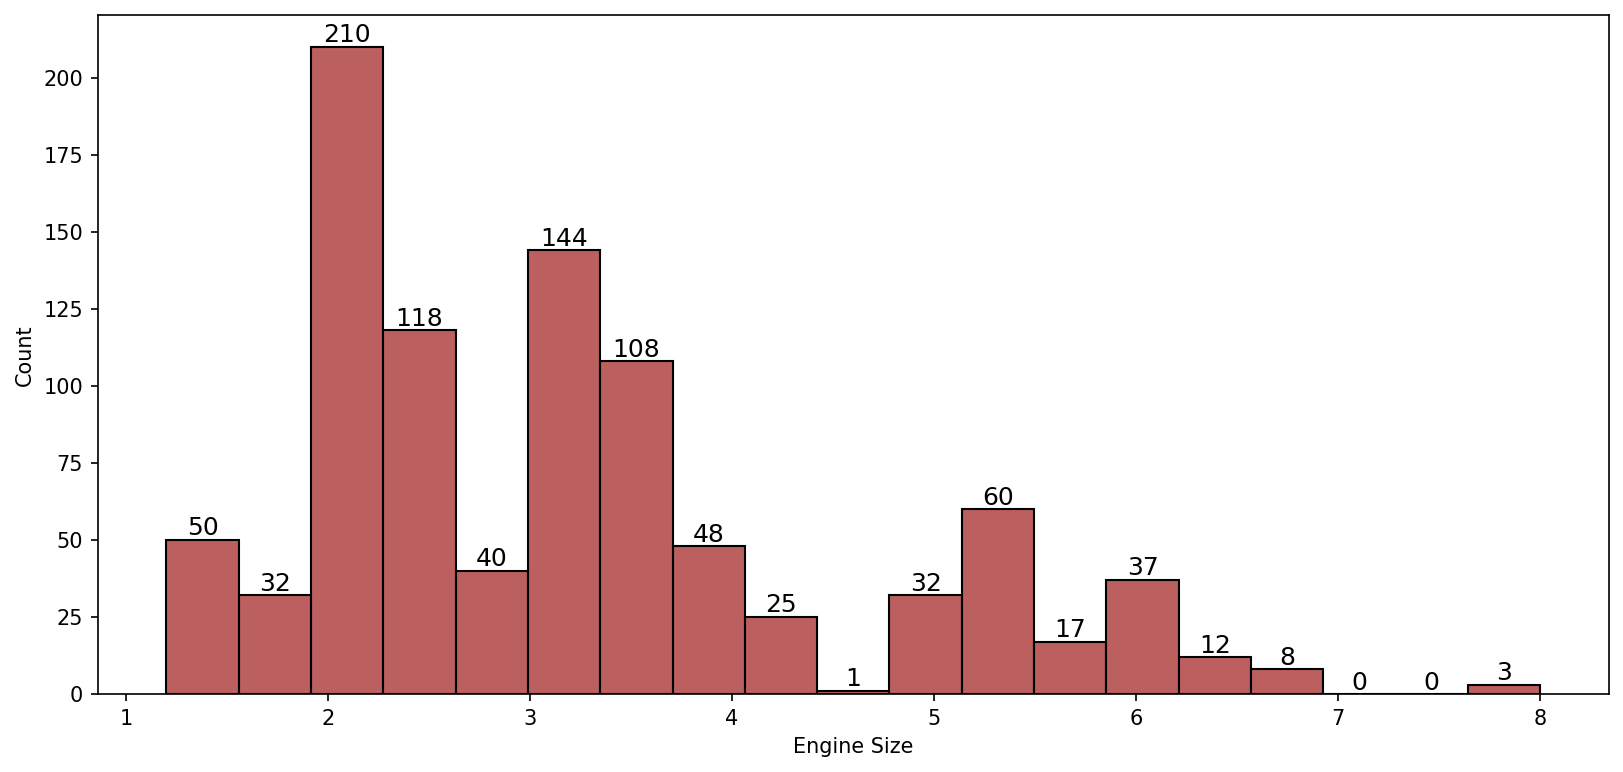

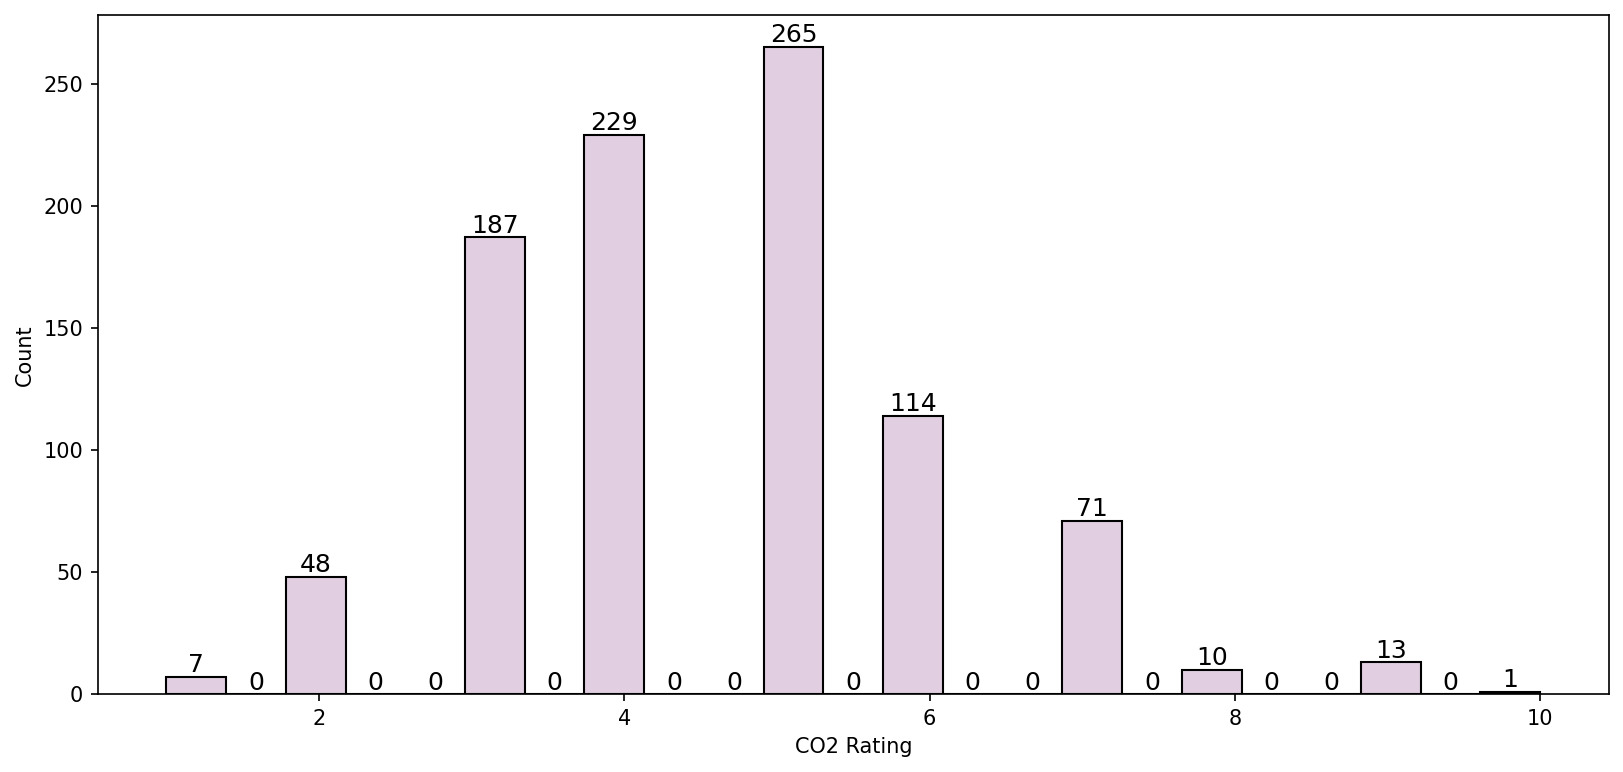

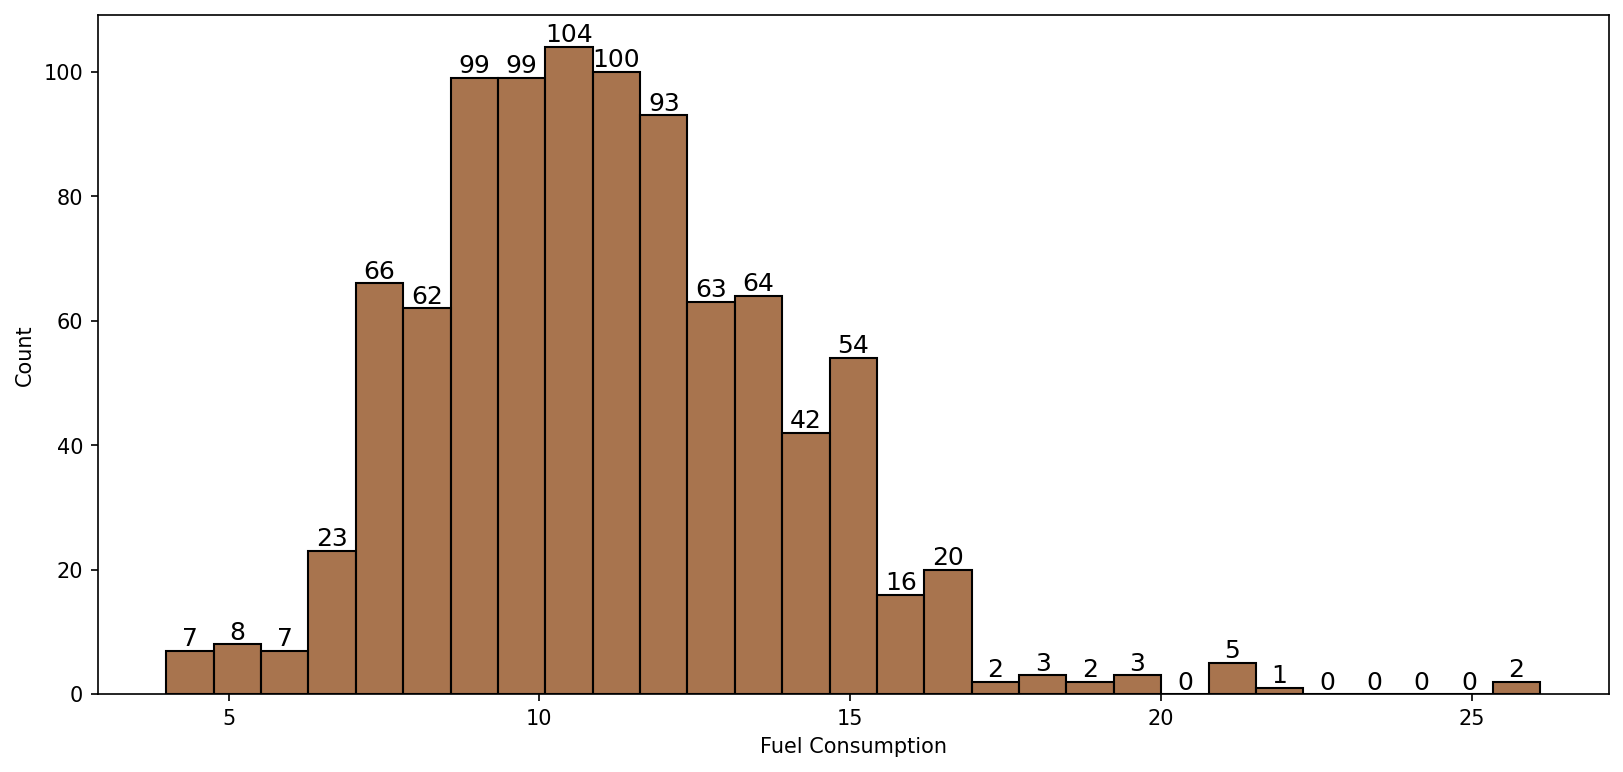

In [430]:
column_set = ['Cylinders','Engine Size','CO2 Rating','Fuel Consumption']
color_set = ['pink','brown','Thistle', 'SaddleBrown']
for colors,col in zip(color_set,column_sets):
    plt.figure(figsize=(13,6), dpi=150)
    chart1=sns.histplot(data=df, x=col, color=colors)
    chart1.bar_label(chart1.containers[0],size=12)
    plt.show()

---
# 4 Bivariate analysis
<span id="bivariate"></span>

---

<a href="#report"><button>REPORT CONTENT</button></a>

## 4.1 Comparison Between all columns
<span id="compare"></span>


<Figure size 1950x900 with 0 Axes>

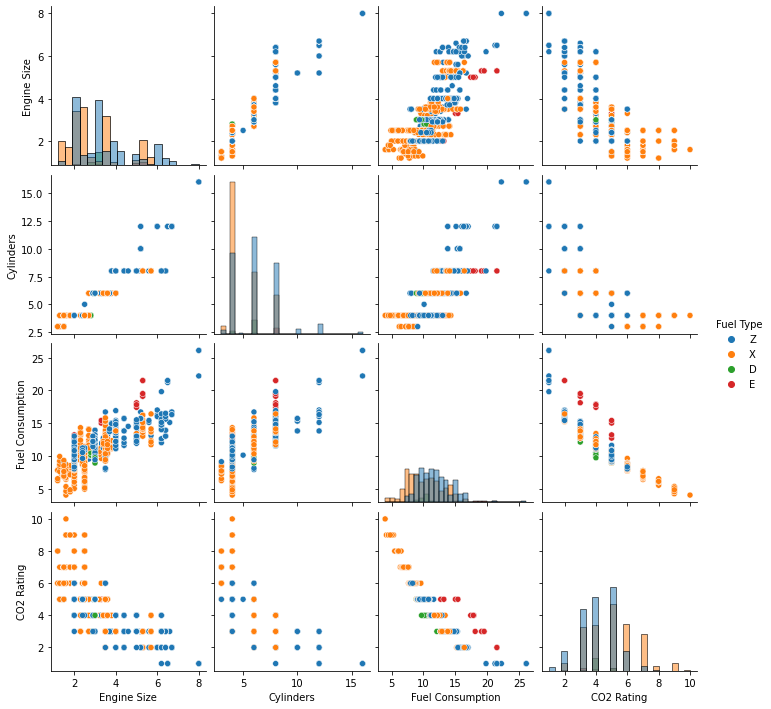

In [431]:
plt.figure(figsize=(13,6), dpi=150)
sns.pairplot(df, hue='Fuel Type',diag_kind='hist')

## 4.2 Comparison between "No. of cylinders" & "Fuel consumption"
<span id="comparecylinder"></span>


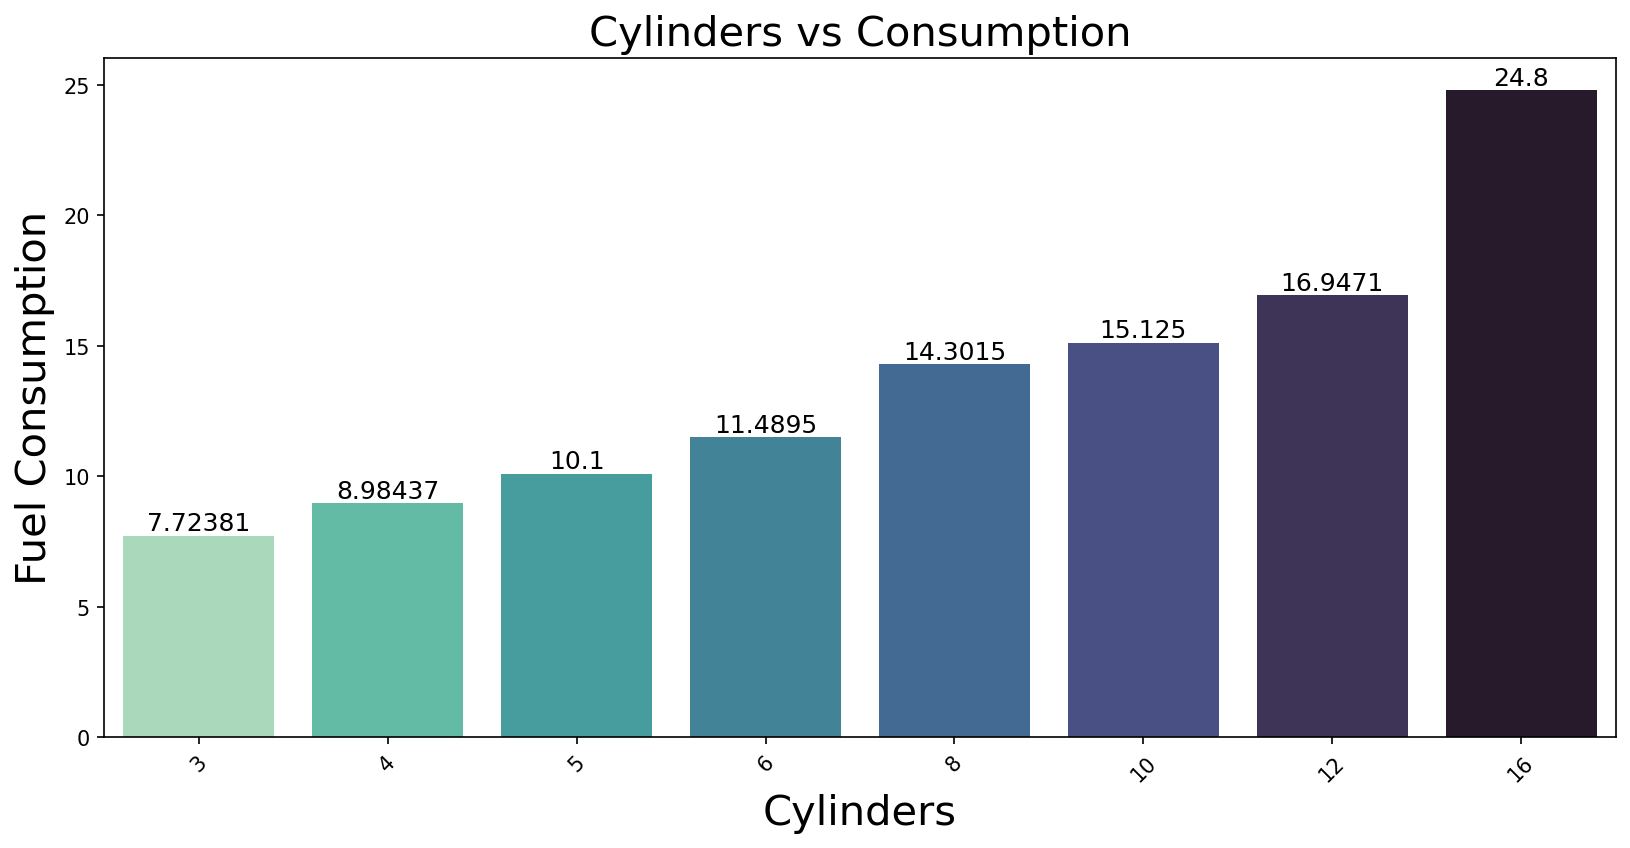

In [432]:
plt.figure(figsize=(13,6), dpi=150)
plt.xticks(rotation=45)
plt.title('Cylinders vs Consumption',size=20)
chart1=sns.barplot( data=df, x="Cylinders", y="Fuel Consumption",palette='mako_r', ci=None)
plt.xlabel('Cylinders',size=20)
plt.ylabel('Fuel Consumption',size=20)
chart1.bar_label(chart1.containers[0],size=12)
plt.show()

## 4.4 Heatmap showing "Pearson correlation" :
<span id="heatcorr"></span>


<AxesSubplot:>

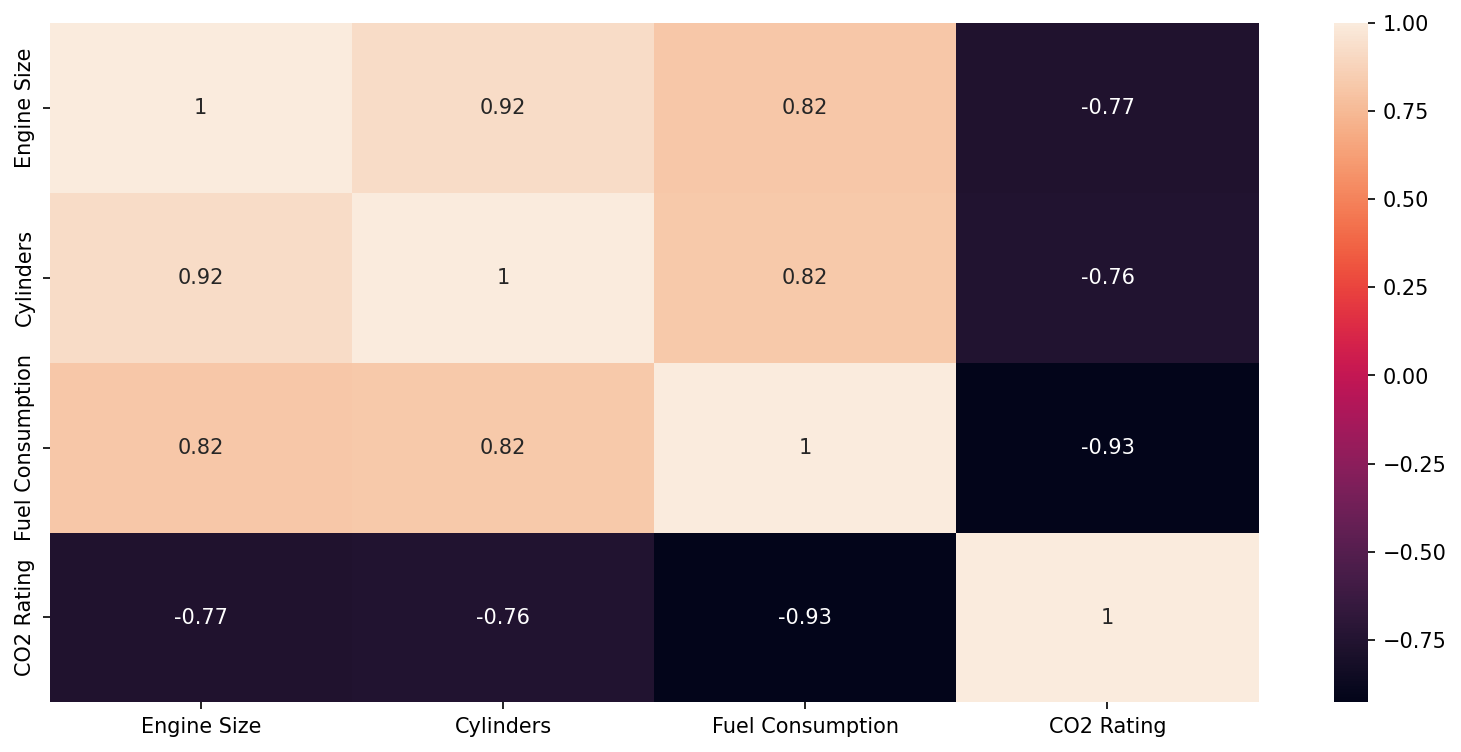

In [433]:
plt.figure(figsize=(13,6), dpi=150)
sns.heatmap(df.corr(),annot=True)

# 5 Performing Chi Square analysis:-
<span id="chi"></span>


<a href="#report"><button>REPORT CONTENT</button></a>

## 5.1 Transmission and Fuel Type:

In [434]:
# from scipy.stats import chi2_contingency
fuel_type= pd.crosstab(df['Transmission'],df['Fuel Type'])

In [435]:
fuel_type

Fuel Type,D,E,X,Z
Transmission,,,,
A10,16,0,36,20
A6,5,6,13,0
A7,0,0,1,0
A8,7,0,60,33
A9,0,0,31,34
AM6,0,0,10,0
AM7,0,0,10,60
AM8,0,0,5,47
AS10,0,6,55,25


In [436]:
Chi_square_statistic,p,dof,expec = chi2_contingency(fuel_type)

In [437]:
alpha = 0.05
print("p_value is " + str(p))
if p <= alpha:
    print('Dependent')
    print('dof is ' +str(dof))
else:
    print('Independent')
    print('dof is ' +str(dof))

p_value is 3.493562430620774e-75
Dependent
dof is 66


## 5.2 Transmission and Vehicle Class:

In [438]:
Class=pd.crosstab(df['Transmission'],df['Vehicle Class'])

In [439]:
Class

Vehicle Class,Compact,Full-size,Mid-size,Minicompact,Minivan,Pickup truck: Small,Pickup truck: Standard,SUV: Small,SUV: Standard,Special purpose vehicle,Station wagon: Mid-size,Station wagon: Small,Subcompact,Two-seater
Transmission,,,,,,,,,,,,,,
A10,0,0,0,0,0,0,32,0,38,0,0,0,2,0
A6,0,0,0,0,0,9,12,3,0,0,0,0,0,0
A7,0,0,0,0,0,0,0,1,0,0,0,0,0,0
A8,0,13,14,3,0,6,30,19,14,0,0,0,0,1
A9,3,3,4,0,3,0,0,24,15,4,1,0,8,0
AM6,0,3,1,0,0,0,0,3,0,0,0,3,0,0
AM7,5,1,8,4,0,0,0,8,0,0,1,3,14,26
AM8,3,14,3,21,0,1,0,5,0,0,1,2,2,0
AS10,9,1,9,1,1,0,35,10,10,0,0,0,10,0


In [440]:
Chi_square_statistic,p,dof,expec = chi2_contingency(Class)

In [441]:
alpha = 0.05
print("p_value is " + str(p))
if p <= alpha:
    print('Dependent')
    print('dof is ' +str(dof))
else:
    print('Independent')
    print('dof is ' +str(dof))

p_value is 6.425451042531906e-175
Dependent
dof is 286


-----
<center>
<h1 style="font-size: 40px; font-family: serif;">5. Data Preprocessing</h1>
</center>
<span id="prepro"></span>

---

<a href="#report"><button>REPORT CONTENT</button></a>


# 5.1 Outlier analysis
<span id="outlier"></span>


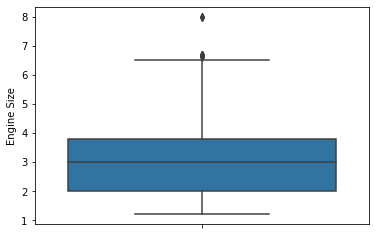

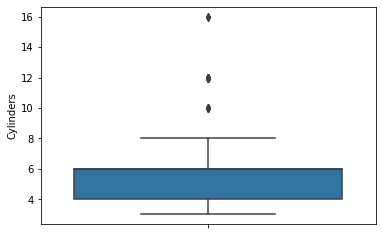

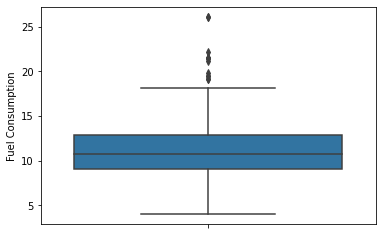

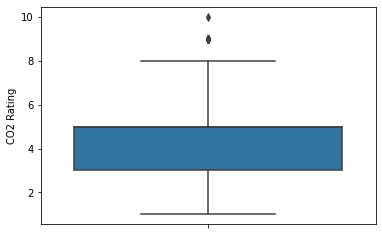

In [442]:
for col in df.columns:
    if df[col].dtypes!= object:
        sns.boxplot(y=col,data=df)
        plt.show()

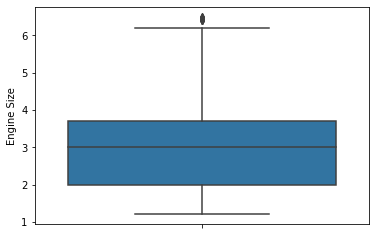

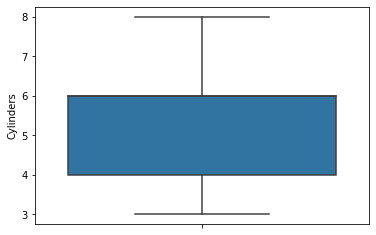

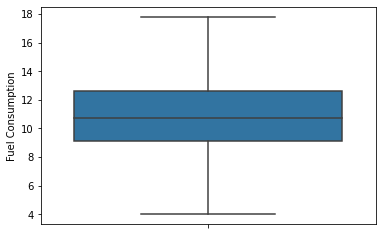

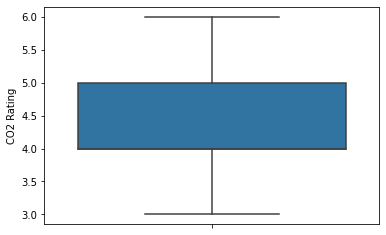

In [443]:
for col in df.columns:
    if df[col].dtypes!= object:
        percentile_25=df[col].quantile(0.25)
        percentile_75=df[col].quantile(0.75)
        IQR=percentile_75-percentile_25
        upper_limit=percentile_75+(1.5*IQR)
        lower_limit=percentile_25-(1.5*IQR)
        df=df[df[col]<=upper_limit]
        df=df[df[col]>=lower_limit]
        plt.figure()
        sns.boxplot(y=col,data=df)

In [444]:
df.shape

(782, 7)

## 5.3 Ordinal encoding
<span id="ordinal"></span>


In [445]:
# from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

order = ['AV10', 'AV8', 'AV6', 'AV7', 'AV', 'AM8', 'AM7', 'M7',  'M6', 'M5', 'AS10', 'AS9', 'AS8', 'AS7', 'AS6', 'AS5',\
        'A10', 'A9', 'A8', 'A7', 'A6', ]

od = OrdinalEncoder(categories = [order])

df["Transmission_X"] = od.fit_transform(df[["Transmission"]])

In [446]:
order = ['Two-seater','Minicompact','Compact','Subcompact','Mid-size','Full-size','SUV: Small','SUV: Standard','Minivan',\
         'Station wagon: Small','Station wagon: Mid-size', 'Pickup truck: Small', 'Special purpose vehicle',\
         'Pickup truck: Standard']

od = OrdinalEncoder(categories = [order])

df["Vehicle Class_X"] = od.fit_transform(df[["Vehicle Class"]])

In [447]:
df.head()

,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel Type,Fuel Consumption,CO2 Rating,Transmission_X,Vehicle Class_X
0,Compact,2.4,4,AM8,Z,8.6,6.0,5.0,2.0
1,SUV: Small,3.5,6,AS10,Z,11.2,4.0,10.0,6.0
2,SUV: Small,2.0,4,AS10,Z,9.9,5.0,10.0,6.0
3,SUV: Small,2.0,4,AS10,Z,10.3,5.0,10.0,6.0
4,Compact,2.0,4,AS10,Z,9.8,5.0,10.0,2.0


## 5.4 One Hot encoding on categorical columns
<span id="onehot"></span>


<a href="#report"><button>REPORT CONTENT</button></a>

In [448]:
new_df = df['Fuel Type'].str.get_dummies()

In [449]:
new_df

,D,E,X,Z
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
940,0,0,0,1
941,0,0,0,1
942,0,0,0,1
943,0,0,0,1


In [450]:
df= pd.concat([df,new_df], axis =1)

In [452]:
df.head()

,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel Type,Fuel Consumption,CO2 Rating,Transmission_X,Vehicle Class_X,D,E,X,Z
0,Compact,2.4,4,AM8,Z,8.6,6.0,5.0,2.0,0,0,0,1
1,SUV: Small,3.5,6,AS10,Z,11.2,4.0,10.0,6.0,0,0,0,1
2,SUV: Small,2.0,4,AS10,Z,9.9,5.0,10.0,6.0,0,0,0,1
3,SUV: Small,2.0,4,AS10,Z,10.3,5.0,10.0,6.0,0,0,0,1
4,Compact,2.0,4,AS10,Z,9.8,5.0,10.0,2.0,0,0,0,1


## 5.5 Split Into Train and Test 
<span id="traintest"></span>


In [453]:
x = df.drop(["Fuel Type",'Fuel Consumption',"Vehicle Class","Transmission"], axis = 1)

In [454]:
x.head()

,Engine Size,Cylinders,CO2 Rating,Transmission_X,Vehicle Class_X,D,E,X,Z
0,2.4,4,6.0,5.0,2.0,0,0,0,1
1,3.5,6,4.0,10.0,6.0,0,0,0,1
2,2.0,4,5.0,10.0,6.0,0,0,0,1
3,2.0,4,5.0,10.0,6.0,0,0,0,1
4,2.0,4,5.0,10.0,2.0,0,0,0,1


In [455]:
y= df['Fuel Consumption']

In [456]:
y.head().to_frame()

,Fuel Consumption
0,8.6
1,11.2
2,9.9
3,10.3
4,9.8


In [457]:
#from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size= 0.30 , random_state= 51)

In [458]:
xtrain

,Engine Size,Cylinders,CO2 Rating,Transmission_X,Vehicle Class_X,D,E,X,Z
454,2.0,4,6.0,8.0,4.0,0,0,1,0
153,3.0,6,5.0,10.0,4.0,0,0,0,1
593,3.4,6,4.0,10.0,4.0,0,0,0,1
275,5.7,8,3.0,18.0,7.0,0,0,1,0
151,3.6,6,3.0,8.0,2.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
631,2.0,4,6.0,14.0,2.0,0,0,1,0
834,5.7,8,3.0,18.0,13.0,0,0,1,0
872,2.5,4,6.0,12.0,4.0,0,0,1,0
584,3.5,6,5.0,12.0,4.0,0,0,1,0


## 5.6 Feature Scaling
<span id="scailing"></span>


<a href="#report"><button>REPORT CONTENT</button></a>

In [459]:
#from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [460]:
xtrain = sc.fit_transform(xtrain)

In [461]:
xtrain

array([[-0.94659202, -1.01098082,  1.58914929, ..., -0.07426107,
         1.14795323, -1.05449946],
       [-0.12731064,  0.29174358,  0.59342803, ..., -0.07426107,
        -0.87111563,  0.94831722],
       [ 0.20040192,  0.29174358, -0.40229323, ..., -0.07426107,
        -0.87111563,  0.94831722],
       ...,
       [-0.53695133, -1.01098082,  1.58914929, ..., -0.07426107,
         1.14795323, -1.05449946],
       [ 0.28233006,  0.29174358,  0.59342803, ..., -0.07426107,
         1.14795323, -1.05449946],
       [ 0.69197075,  1.59446798, -0.40229323, ..., -0.07426107,
        -0.87111563,  0.94831722]])

In [462]:
xtest = sc.transform(xtest)

In [463]:
xtest

array([[ 0.28233006,  0.29174358, -0.40229323, ..., -0.07426107,
         1.14795323, -1.05449946],
       [ 0.36425819,  0.29174358,  0.59342803, ..., -0.07426107,
         1.14795323, -1.05449946],
       [ 0.69197075,  1.59446798, -1.3980145 , ..., -0.07426107,
        -0.87111563,  0.94831722],
       ...,
       [-0.94659202, -1.01098082,  0.59342803, ..., -0.07426107,
         1.14795323, -1.05449946],
       [ 0.69197075,  0.29174358, -0.40229323, ..., -0.07426107,
        -0.87111563,  0.94831722],
       [ 1.75703655,  1.59446798, -1.3980145 , ..., -0.07426107,
         1.14795323, -1.05449946]])

-----
<center>
<h1 style="font-size: 40px; font-family: serif;">6. Training Models</h1>
</center>
<span id="model"></span>

---

<a href="#report"><button>REPORT CONTENT</button></a>

# 6.1 Linear Regression
<span id="linear"></span>


In [465]:
#from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [467]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [468]:
lr.intercept_

11.109872029250457

**Checking if model is overfitted or underfitted**

In [469]:
print("training score = ",lr.score(xtrain,ytrain))
print("testing score = ",lr.score(xtest,ytest))

training score =  0.9271659503330646
testing score =  0.9176591218304293


In [470]:
ypred = lr.predict(xtest)

In [471]:
r2_score(ytest, ypred)

0.9176591218304293

# 6.2 Decision Tree Regressor
<span id="decision"></span>


<a href="#report"><button>REPORT CONTENT</button></a>

In [528]:
<a href="#report"><button>REPORT CONTENT</button></a># from sklearn.tree import DecisionTreeRegressor
dc=DecisionTreeRegressor(max_depth=4)

In [529]:
dc.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=4)

In [530]:
ypred=dc.predict(xtest)

**Checking if model is overfitted or underfitted**

In [531]:
print("training score = ",dc.score(xtrain,ytrain))
print("testing score = ",dc.score(xtest,ytest))

training score =  0.9317836787933403
testing score =  0.8683447093307438


In [532]:
r2_score(ytest, ypred)

0.8683447093307438

**Visualising the tree**

In [533]:
from sklearn import tree

In [534]:
new = df[["Vehicle Class","Engine Size","Cylinders","Transmission","Fuel Type","CO2 Rating"]]

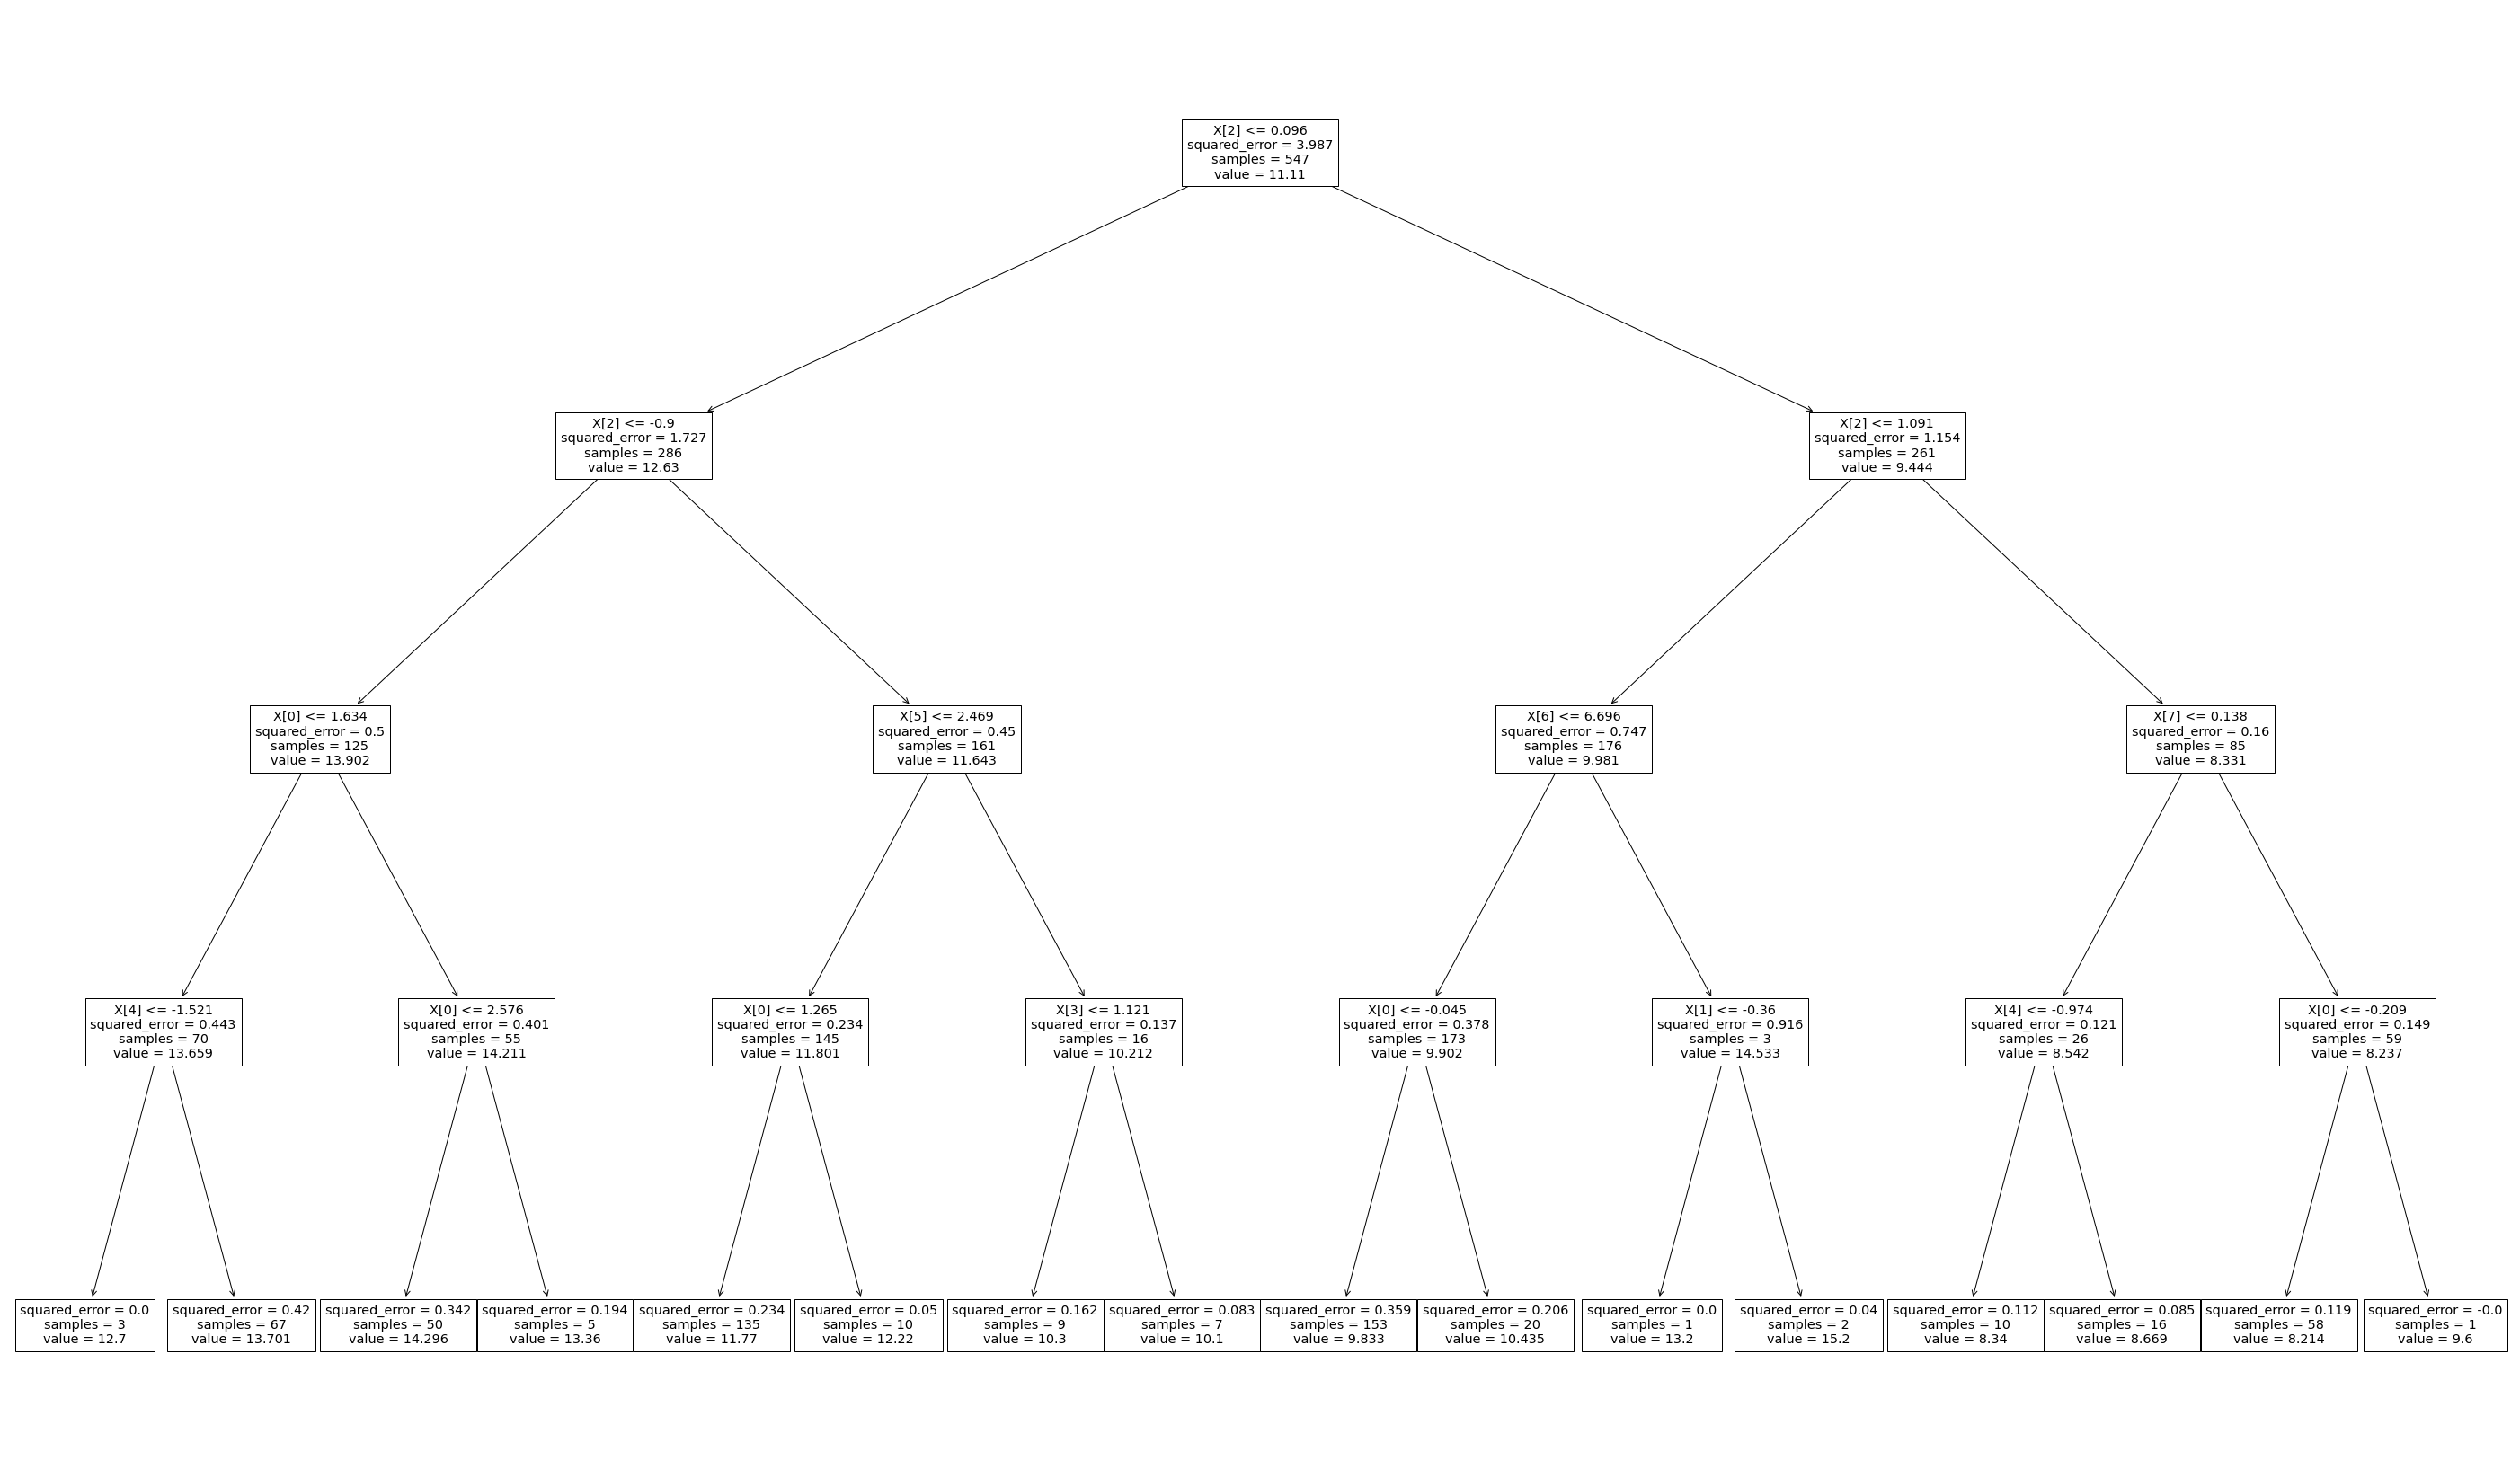

In [536]:
plt.figure(figsize=(50,30))
tree.plot_tree(dc)
plt.show()

# 6.3 Random Forest Regressor
<span id="rf"></span>

<a href="#report"><button>REPORT CONTENT</button></a>

In [538]:
#from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [539]:
no_of_decision_tree = [10,20,30,40,50,60,70,80,90,100]
max_no_of_features = ['sqrt','log2']
max_depth = [6,7,8,9,10,11,12,13,14,15]
criterion_of_decision_tree = ["squared_error", "poisson"]
min_sample_split=[2,3,4,5,6]

In [540]:
random_grid = {
    'n_estimators' : no_of_decision_tree,
    'max_features' : max_no_of_features,
    'max_depth' : max_depth,
    'criterion' : criterion_of_decision_tree,
    'min_samples_split' : min_sample_split
}

### Hyper Parameter Tuning

In [541]:
from sklearn.model_selection import RandomizedSearchCV
rscv = RandomizedSearchCV(estimator = rf , param_distributions = random_grid , n_iter = 25 , cv = 5 ,n_jobs=-1)
rscv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=25,
                   n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'poisson'],
                                        'max_depth': [6, 7, 8, 9, 10, 11, 12,
                                                      13, 14, 15],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': [2, 3, 4, 5, 6],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]})

In [542]:
rscv.best_params_

{'n_estimators': 50,
 'min_samples_split': 3,
 'max_features': 'sqrt',
 'max_depth': 11,
 'criterion': 'squared_error'}

In [546]:
rf = RandomForestRegressor(n_estimators = 50 , min_samples_split = 3, max_features =  'sqrt', max_depth = 11, criterion='squared_error')

In [547]:
rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)

**Checking if model is overfitted or underfitted**

In [548]:
print("training score = ",rf.score(xtrain,ytrain))
print("testing score = ",rf.score(xtest,ytest))

training score =  0.9717874910554267
testing score =  0.8967677143284637


In [549]:
r2_score(ytest,ypred)

0.8967677143284637

-----
<center>
<h1 style="font-size: 40px; font-family: serif;">7. Model Deployment</h1>
</center>
<span id="deployment"></span>

---

<a href="#report"><button>REPORT CONTENT</button></a>

# 7.1 Pickling Model and Scaler object for Deployment
<span id="pickling"></span>


In [ ]:
import pickle as pk

In [ ]:
filename = "scaled_data.sav"
pk.dump(sc, open(filename, "wb")) #write binary = wb

In [ ]:
loaded_scaler = pk.load(open("scaled_data.sav", "rb")) #read binary = rb

In [ ]:
filename = "trained_model_rf.sav"
pk.dump(rf, open(filename, "wb"))

In [ ]:
loaded_model = pk.load(open("trained_model_rf.sav", "rb"))

In [ ]:
inp = ["Compact",2.4,4,"AM",6.0,"X"]    # input example

In [ ]:
def input_converter(inp):
    vcl = ['Two-seater','Minicompact','Compact','Subcompact','Mid-size','Full-size','SUV: Small','SUV: Standard','Minivan','Station wagon: Small','Station wagon: Mid-size','Pickup truck: Small','Special purpose vehicle','Pickup truck: Standard']
    trans = ['AV','AM','M','AS','A']
    fuel = ["D","E","X","Z"]
    lst = []
    for i in range(9):
        if(type(inp[i]) == str):
            if(inp[i] in vcl):
                lst.append(vcl.index(inp[i]))
            elif(inp[i] in trans):
                lst.append(trans.index(inp[i]))
            elif(inp[i] in fuel):
                if(fuel.index(inp[i]) == 0):
                    lst.extend([1,0,0,0])
                    break
                elif(fuel.index(inp[i]) == 1):
                    lst.extend([0,1,0,0])
                    break
                elif(fuel.index(inp[i]) == 2):
                    lst.extend([0,0,1,0])
                    break
                elif(fuel.index(inp[i]) == 3):
                    lst.extend([0,0,0,1])
        else:
            lst.append(inp[i])

    arr = np.asarray(lst)
    arr = arr.reshape(1, -1)
    arr = loaded_scaler.transform(arr)
    prediction = loaded_model.predict(arr)
    
    return(f"The Fuel Consumption L/100km is {round(prediction[0],2)}")



input_converter(inp)

'The Fuel Consumption L/100km is 8.8'

-------
-------
-------
<center>
<h1 style="font-size: 30px; font-family: serif;">Thank you</h1>
</center>